# Using DBSCAN on synthetic dataset

## Import the necessary libraries

In [16]:
!pip install scikit-learn

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn

from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles

A. Create a synthetic dataset using make_blobs

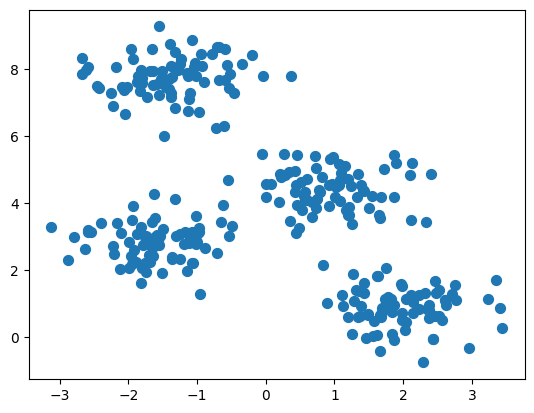

In [18]:
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

# Plot the data
plt.scatter(X[:, 0], X[:, 1], s=50);

#### Lets use NearestNeighbors to find the optimal _eps_ value.

In [19]:
nn = NearestNeighbors(n_neighbors=20).fit(X)
distances, indices = nn.kneighbors(X)

> Lets plot the distances of each point in ascending order of the distance, elbow point will give us the samller range for optimal _eps_ value.

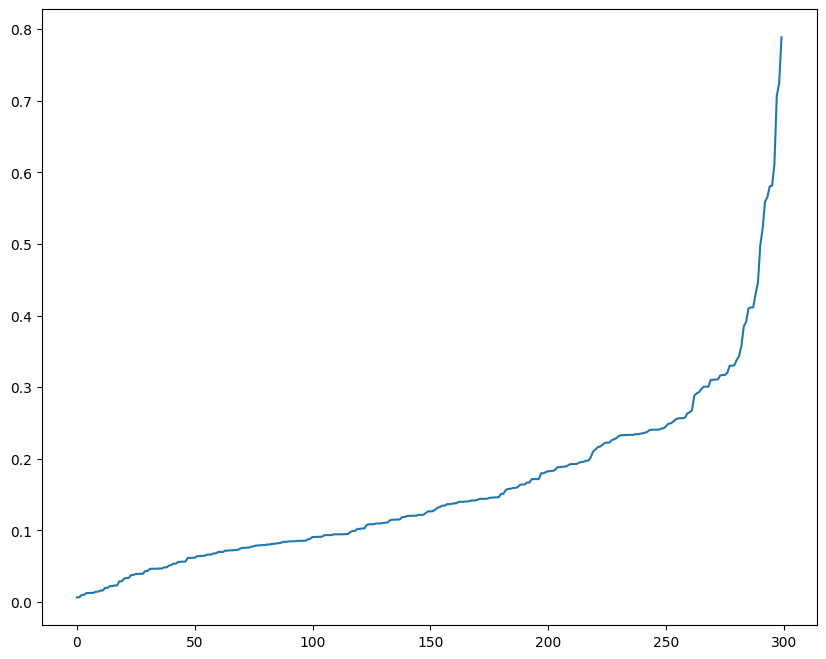

In [20]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,8))
plt.plot(distances)

In [21]:
min_samples = range(3,5)
epsilon = np.arange(0.4, 0.9, 0.1) # returns array of ranging from 0.05 to 0.13 with step of 0.01
epsilon

array([0.4, 0.5, 0.6, 0.7, 0.8])

In [22]:
output = []

for ms in min_samples:
    for ep in epsilon:
        labels = DBSCAN(min_samples=ms, eps = ep).fit(X).labels_
        score = metrics.silhouette_score(X, labels)
        output.append((ms, ep, score))

In [23]:
min_samples, eps, score = sorted(output, key=lambda x:x[-1])[-1]
print(f"Best silhouette_score: {score}")
print(f"min_samples: {min_samples}")
print(f"eps: {eps}")

Best silhouette_score: 0.6605541095579138
min_samples: 4
eps: 0.6


## Train the model

In [24]:
ep = eps
dbscan = DBSCAN(eps = ep, min_samples=min_samples).fit(X)
labels = dbscan.labels_

# Number of clusters in labels
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Number of noise
n_noise_ = list(labels).count(-1)

silhouette_score = metrics.silhouette_score(X, labels)

## Display the number of clusters, noise and silhouette score

In [25]:
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Silhouette scrore", silhouette_score)

Estimated number of clusters: 4
Estimated number of noise points: 5
Silhouette scrore 0.6605541095579138


## Plot the clustered dataset

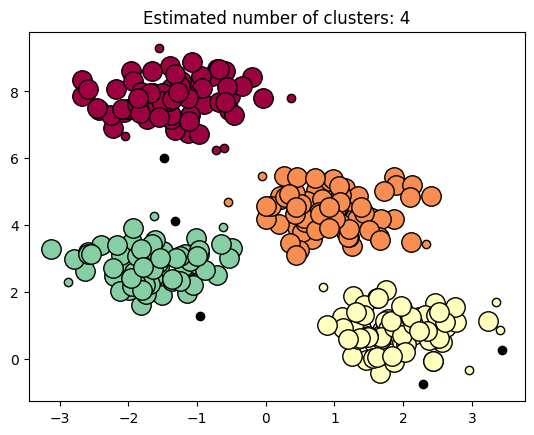

In [26]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

## B. Create a synthetic dataset using make_moons

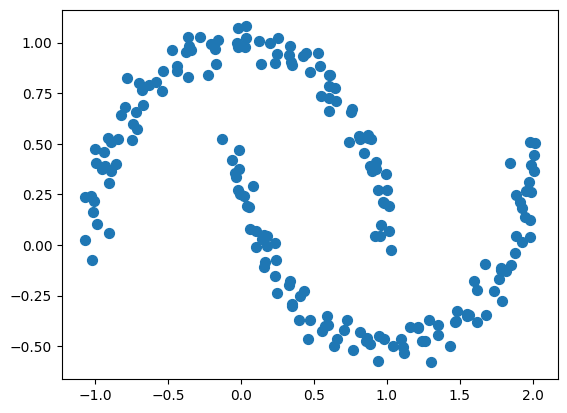

In [27]:
X, y = make_moons(200, noise=.05, random_state=0)


# Plot the raw data
plt.scatter(X[:, 0], X[:, 1], s=50);

## Train the model

In [28]:
dbscan = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

n_noise_ = list(labels).count(-1)

silhouette_score = metrics.silhouette_score(X, labels)


## Display the number of clusters, noise and silhouette score

In [29]:
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Silhouette scrore", metrics.silhouette_score(X, labels))

Estimated number of clusters: 2
Estimated number of noise points: 0
Silhouette scrore 0.32585318950197517


## Plot the clustered dataset

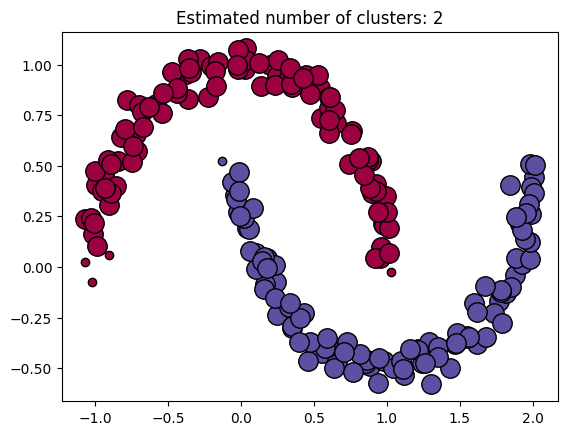

In [30]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

## Create a synthetic dataset using make_circles

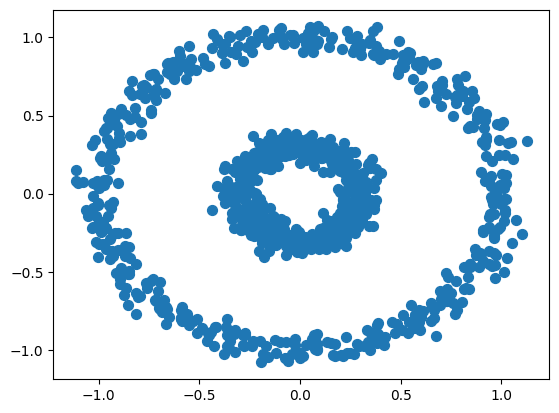

In [31]:
X, y = make_circles(n_samples=1_000, factor=0.3, noise=0.05, random_state=0)

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], s=50);

## Train the model

In [32]:
dbscan = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

n_noise_ = list(labels).count(-1)

silhouette_score = metrics.silhouette_score(X, labels)


## Display the number of clusters, noise and silhouette score

In [33]:
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Silhouette scrore", metrics.silhouette_score(X, labels))

Estimated number of clusters: 2
Estimated number of noise points: 0
Silhouette scrore 0.20775255433898365


## Plot the clustered dataset

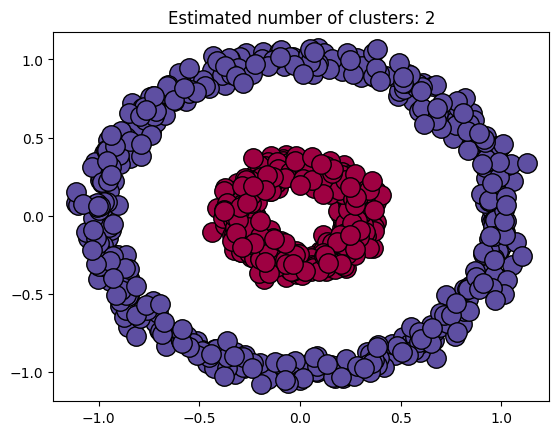

In [34]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()